## LOB EDA (Sam Initial)

## Contents

- [Load Data](#Load-Data)<br> 
- [Data Types](#Data-Types)<br>
- [Nulls](#Nulls)<br>
- [EDA](#EDA)<br>
- [Outliers](#Outliers)<br>
- [Financial Technical Indicators](#Financial-Technical-Indicators)<br>

In [ ]:
#brand colours- #1A7B99(Lightl Blue) #35210D(Brown) #101820(Dark Blue)

## Load Data

In [29]:
#import required libraries
import pandas as pd

In [30]:
#load sample csv
lob = pd.read_csv('EDA_lob_output_data_sample.csv')

In [31]:
#dataset dimensions
lob.shape

(1037934, 6)

In [32]:
#dataset info
lob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037934 entries, 0 to 1037933
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1037934 non-null  float64
 1   Exchange   1037934 non-null  object 
 2   Bid        1037934 non-null  object 
 3   Ask        1037934 non-null  object 
 4   Date       1037934 non-null  object 
 5   Mid_Price  1037853 non-null  float64
dtypes: float64(2), object(4)
memory usage: 47.5+ MB


In [33]:
#visual look at first 5 rows
lob.head()

,Timestamp,Exchange,Bid,Ask,Date,Mid_Price
0,0.000,Exch0,[],[],2025-01-02,NaN
1,0.279,Exch0,"[[1, 6]]",[],2025-01-02,NaN
2,1.333,Exch0,"[[1, 6]]","[[800, 1]]",2025-01-02,400.5
3,1.581,Exch0,"[[1, 6]]","[[799, 1]]",2025-01-02,400.0
4,1.643,Exch0,"[[1, 6]]","[[798, 1]]",2025-01-02,399.5


In [34]:
#reorder cols
order= ['Timestamp', 'Date', 'Exchange','Bid', 'Ask', 'Mid_Price']
lob =lob[order]

 [Return to contents](#Contents)<br>

## Data Types

In [37]:
#convert 'Date' to datetime
lob['Date'] = pd.to_datetime(lob['Date'])

#all other types fine but we might want to convert exchange to a category dtype- some benefit re memory/speed?

In [38]:
#check if Bid/ Ask are actual lists
print(lob['Bid'].apply(type).unique())
print(lob['Ask'].apply(type).unique())

[<class 'str'>]
[<class 'str'>]


In [39]:
#convert to lists
#import required libraries
import ast 

#convert
lob['Bid'] = lob['Bid'].apply(ast.literal_eval)
lob['Ask'] = lob['Ask'].apply(ast.literal_eval)

In [40]:
#check if Bid/ Ask are actual lists
print(lob['Bid'].apply(type).unique())
print(lob['Ask'].apply(type).unique())

[<class 'list'>]
[<class 'list'>]


 [Return to contents](#Contents)<br>

## Nulls

In [41]:
#how many NaN/null in mid price?
missing_mid_price_count = lob['Mid_Price'].isnull().sum()

print(f'Missing "Mid_Price" values: {missing_mid_price_count} ({missing_mid_price_count/len(lob):.4f}% of the sample)')

Missing "Mid_Price" values: 81 (0.0001% of the sample)


In [42]:
#drop missing rows as represents small % of sample (i)
lob = lob.dropna(subset=['Mid_Price'])

In [43]:
#if large portion of whole dataset we should consider interpolation
#lob['Mid_Price'].interpolate(method='linear', inplace=True)

In [44]:
#check for rows where both 'Bid' and 'Ask' are empty lists
empty_bid_ask = lob.apply(lambda row: (not row['Bid']) and (not row['Ask']), axis=1)
empty_bid_ask_count = empty_bid_ask.sum()

print(f'Missing "Bid/Ask" values: {empty_bid_ask_count} ({empty_bid_ask_count/len(lob):.4f}% of the sample)')

Missing "Bid/Ask" values: 0 (0.0000% of the sample)


In [45]:
#not sure why this isn't working- I can visually see an empty list in the top row yet can't identify it
#Ah so empty containers doens't necessarily return as a null 
empty_bid_ask = lob.apply(lambda row: row['Bid'] == [] and row['Ask'] == [], axis=1)
empty_bid_ask_count = empty_bid_ask.sum()

print(f'Missing "Bid/Ask" values: {empty_bid_ask_count} ({empty_bid_ask_count/len(lob):.4f}% of the sample)')

Missing "Bid/Ask" values: 0 (0.0000% of the sample)


Ok I think I actually removed these types when I removed the NaN for mid_price! panic over and also where Ask OR Bid is []

In [46]:
#no missing Timestamp, Exhange or Date

In [47]:
lob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037853 entries, 2 to 1037933
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1037853 non-null  float64       
 1   Date       1037853 non-null  datetime64[ns]
 2   Exchange   1037853 non-null  object        
 3   Bid        1037853 non-null  object        
 4   Ask        1037853 non-null  object        
 5   Mid_Price  1037853 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.4+ MB


 [Return to contents](#Contents)<br>

## EDA

__Univariate__

_Date_

In [48]:
#range
date_min = lob['Date'].min()
date_max = lob['Date'].max()

print(f"Date range- {date_min.date()} to {date_max.date()}")

Date range- 2025-01-02 to 2025-01-06


In [49]:
#how many unique dates
unique_dates = lob['Date'].nunique()

print(f"Unique dates- {unique_dates}") #will be small as sample

Unique dates- 3


In [50]:
#freq of dates 
date_counts = lob['Date'].value_counts()
most_common_date = date_counts.idxmax()
frequency_most_common_date = date_counts.max()

print(f"Most common date- {most_common_date.date()} (Frequency- {frequency_most_common_date})")

Most common date- 2025-01-02 (Frequency- 352960)


_Exchange_

In [51]:
#how many unique values
unique_exchange = lob['Exchange'].nunique()

print(f"Unique exchange values- {unique_exchange}")

Unique exchange values- 1


In [52]:
#suggest delete this column if whole data set also has 1 unique value
#lob = lob.drop('Exchange', axis=1)

_Timestamp_

In [58]:
#how many unique values
unique_timestamp = lob['Timestamp'].nunique()

print(f"Unique timestamp values- {unique_timestamp}")

Unique timestamp values- 716146


In [62]:
#range
timestamp_range = lob['Timestamp'].max() - lob['Timestamp'].min()

print(f"Max timestamp- {lob['Timestamp'].max()}  Min timestamp-{lob['Timestamp'].min()}")
print(f"Range of timestamp- {timestamp_range}")

Max timestamp- 30599.976  Min timestamp-1.333
Range of timestamp- 30598.643


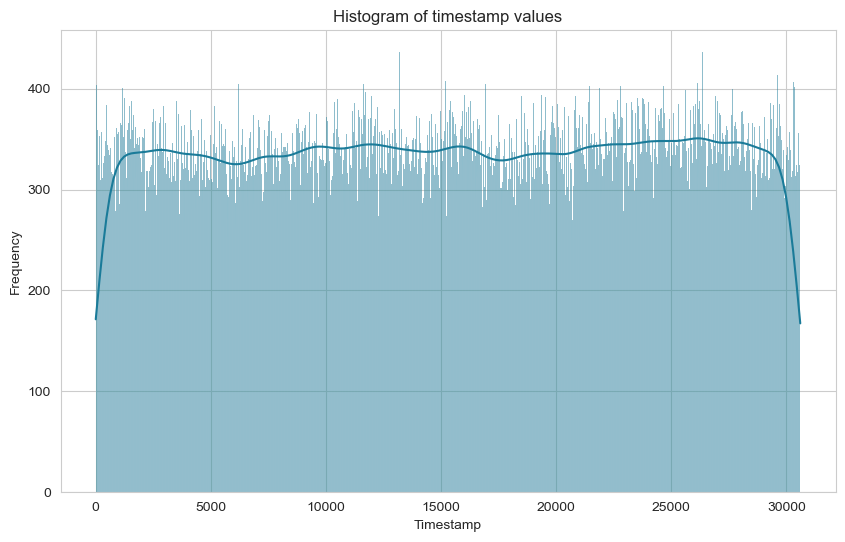

In [71]:
#what is the distribution?
#import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

#histogram
plt.figure(figsize=(10, 6))
sns.histplot(lob['Timestamp'], kde=True, color='#1A7B99', binwidth=10)
plt.title('Histogram of timestamp values')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show() 

Relatively uniform distirbution across most of the range, with a consistent frequency- suggests timestamps are evenly spaced over time for majority of data. Noticeable drops at start and end of range- could suggest fewer events/ data points are recorded here. Some spike in frequency at regular intervals- could indicate periodic activity within the data. Uniformity of central range shown again by KDE stability. Suggest explore extremeties of range for outliers.

In [76]:
std_dev = lob['Timestamp'].std() #spread
skewness = lob['Timestamp'].skew() #asymmetry
kurtosis = lob['Timestamp'].kurtosis() #tailedness

print(f"Standard deviation- {std_dev:.4f}")
print(f"Skewness- {skewness:.4f}")
print(f"Kurtosis- {kurtosis:.4f}")

Standard deviation- 8839.9945
Skewness- -0.0141
Kurtosis- -1.2027


Std dev shows wide range which is reasonable given the context. Skewness very close to 0 which means timestamp is very symmetrical. Slightly negative means there is a slightly longer tail on the left hand side. Platykurtic kurtosis level (less than zero)so distribution has lighter tails and is less peaked than normal distribution. Fewer outlier to be found than would be expected with normal. 

_Bid/ Ask_

In [98]:
#num bids and asks
num_bids = lob['Bid'].apply(len)
num_asks = lob['Ask'].apply(len)

print("Number of bids-", num_bids.describe().round(2))
print("Number of asks-", num_asks.describe().round(2))

Number of bids- count    1037853.00
mean           8.15
std            2.06
min            1.00
25%            7.00
50%            8.00
75%           10.00
max           16.00
Name: Bid, dtype: float64
Number of asks- count    1037853.00
mean           6.15
std            1.70
min            1.00
25%            5.00
50%            6.00
75%            7.00
max           13.00
Name: Ask, dtype: float64


In [106]:
#avg bid and ask prices (assuming [price, quantity])
import numpy as np

avg_bid_price = lob['Bid'].apply(lambda x: np.average(
    [item[0] for item in x], weights=[item[1] for item in x]) if x else np.nan)
avg_ask_price = lob['Ask'].apply(lambda x: np.average(
    [item[0] for item in x], weights=[item[1] for item in x]) if x else np.nan)

print("Average bid price-", avg_bid_price.describe().round(2))
print("Average ask price-", avg_ask_price.describe().round(2))

Average bid price- count    1037853.00
mean         230.80
std           39.35
min            1.00
25%          209.33
50%          236.46
75%          258.38
max          336.75
Name: Bid, dtype: float64
Average ask price- count    1037853.00
mean         438.39
std           71.94
min          255.00
25%          387.04
50%          428.86
75%          478.97
max          800.00
Name: Ask, dtype: float64


In [104]:
#spread (assuming best bid is highest price and best ask is lowest price)
spread = lob.apply(lambda row: (min(item[0] for item in row['Ask']) - max(
    item[0] for item in row['Bid'])) if row['Bid'] and row['Ask'] else np.nan, axis=1)

print("Spread-", spread.describe().round(2))

Spread- count    1037853.00
mean          17.26
std           40.83
min            1.00
25%            3.00
50%            6.00
75%           12.00
max          799.00
dtype: float64


In [109]:
#frequency distribution of bid/ask sizes (if second element is the size)
bid_sizes = [item[1] for sublist in lob['Bid'].tolist() for item in sublist]
ask_sizes = [item[1] for sublist in lob['Ask'].tolist() for item in sublist]

print("\nBid Sizes Frequency distribution:\n", pd.Series(bid_sizes).value_counts())
print("Ask Sizes Frequency distribution:\n", pd.Series(ask_sizes).value_counts())


Bid Sizes Frequency distribution:
 1     1922365
2     1461808
3     1153091
4      893885
5      677473
6      543182
7      411870
8      311396
9      249280
10     184308
11     146268
12     116418
13      89507
14      59804
15      51249
16      44360
17      29734
18      26406
19      16643
20      16045
21      11903
22       9660
23       6381
24       5951
25       4183
27       2298
26       2019
29       1897
28        927
30        848
32        743
31        690
37        485
33        470
41        262
34        169
38        111
40        108
36         94
35         80
43         27
39         21
44          7
dtype: int64
Ask Sizes Frequency distribution:
 1     1305881
2     1296858
3     1248452
4     1197275
5     1174806
6       51179
7       40229
8       30657
9       19815
10      11103
11       1653
12       1388
13       1047
14        381
15        168
16         25
18         17
dtype: int64


_Mid_Price_

In [79]:
#describe
lob['Mid_Price'].describe().round(2)

count    1037853.00
mean         302.97
std           27.08
min          133.50
25%          289.50
50%          298.50
75%          314.00
max          557.00
Name: Mid_Price, dtype: float64

Median is quite close to the mean which suggests the data might be somewhat symmetrically distributed. The range is quite large (~423) so we can observe a wide variety here. As mean is slightly greater we can assume right-skewed so potentially some high outliers to deal with. Relatively small std dev suggests relatively narrow band around the mean.

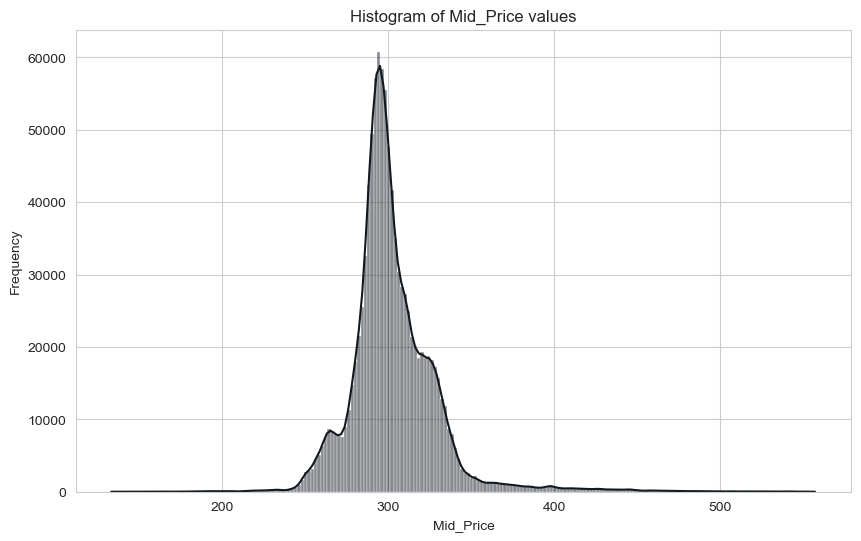

In [85]:
#what's the distribution look like?
#import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

#histogram
plt.figure(figsize=(10, 6))
sns.histplot(lob['Mid_Price'], kde=True, color='#101820', binwidth=2)
plt.title('Histogram of Mid_Price values')
plt.xlabel('Mid_Price')
plt.ylabel('Frequency')
plt.show() 

Strong central beak around the 300 mark and narrow relative spread around confirms what we saw in the stats. Longer tail on the right- recommend assess here for outliers. Some points maybe to investigate around the middle that extend outside of the central peak. I feel this represents a price without large levels of volatility. 

In [84]:
skewness = lob['Mid_Price'].skew() #asymmetry
kurtosis = lob['Mid_Price'].kurtosis() #tailedness

print(f"Skewness- {skewness:.4f}")
print(f"Kurtosis- {kurtosis:.4f}")

Skewness- 1.9606
Kurtosis- 10.3824


Skewness of greater tan 1 should us our data is right-skewed which is consistent with the histograms long right tail. Fairly normal distribution and the leptokurtic kurtosis level shows us we have a greater chance of more outliers than a normal distribution would have. 

__Multivariate__

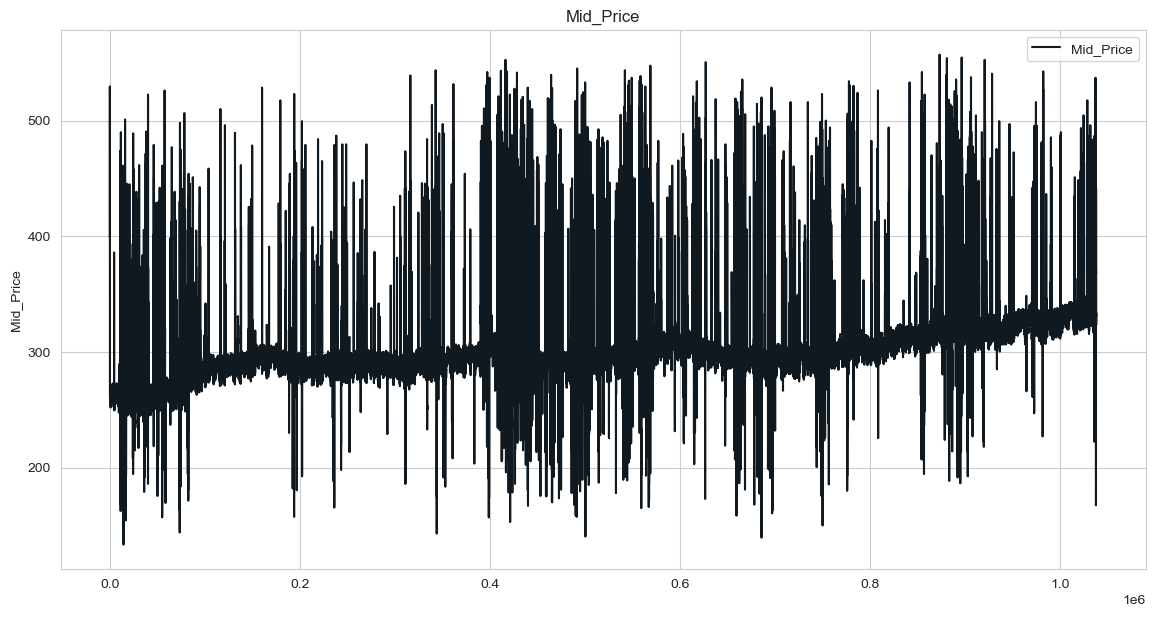

In [93]:
#Mid_Price by index

#lineplot
plt.figure(figsize=(14, 7))
plt.plot(lob.index, lob['Mid_Price'], label='Mid_Price', color='#101820')

plt.ylabel('Mid_Price')
plt.title('Mid_Price')
plt.legend()
plt.show() #we will need SMA's to see something intelligble

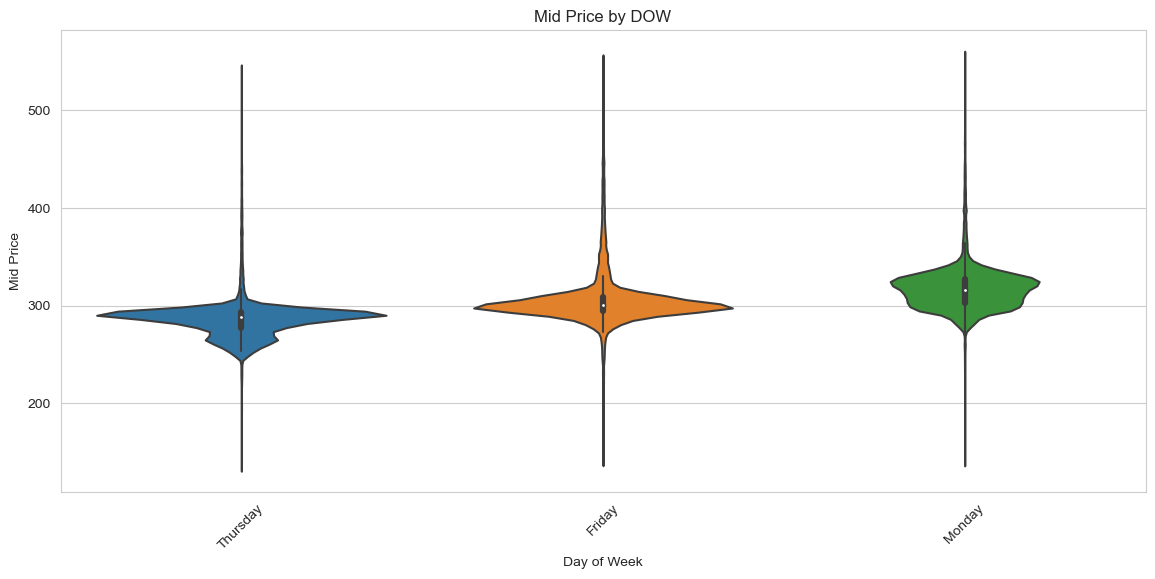

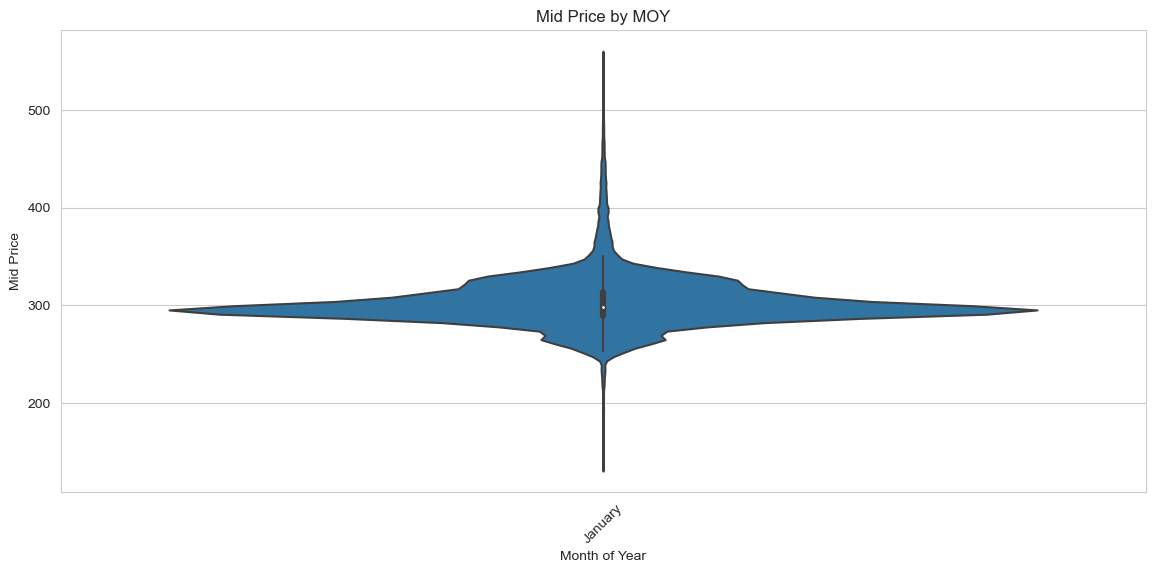

In [96]:
#what's the distribution of mid_price like by day of week or month? 
palette = "tab10"

#vplot of 'Mid price by dow
plt.figure(figsize=(14, 6))
sns.violinplot(x=lob['Date'].dt.day_name(), y=lob['Mid_Price'], palette=palette)
plt.title('Mid Price by DOW')
plt.xlabel('Day of Week')
plt.ylabel('Mid Price')
plt.xticks(rotation=45)
plt.show()

#vplot of Midprice' by moy
plt.figure(figsize=(14, 6))
sns.violinplot(x=lob['Date'].dt.month_name(), y=lob['Mid_Price'], palette=palette)
plt.title('Mid Price by MOY')
plt.xlabel('Month of Year')
plt.ylabel('Mid Price')
plt.xticks(rotation=45)
plt.show() #Not great as we only have 3 days of data from one month but will be good to see on whole set

Some interesting differences in day with just the sample- I wont draw conclusions here though as patterns could be very different with whole set. Median across days seems fairly close. Friday seems to have a wider range, indicating more variation in mid prices for this day. Some outliers on Friday and Monday that would be good to identify. Thursdays distribution is fairly symmetrical whereas Friday/Monday have slight asymmetries. Monday is slightly left-skewed and Friday right-skewed.

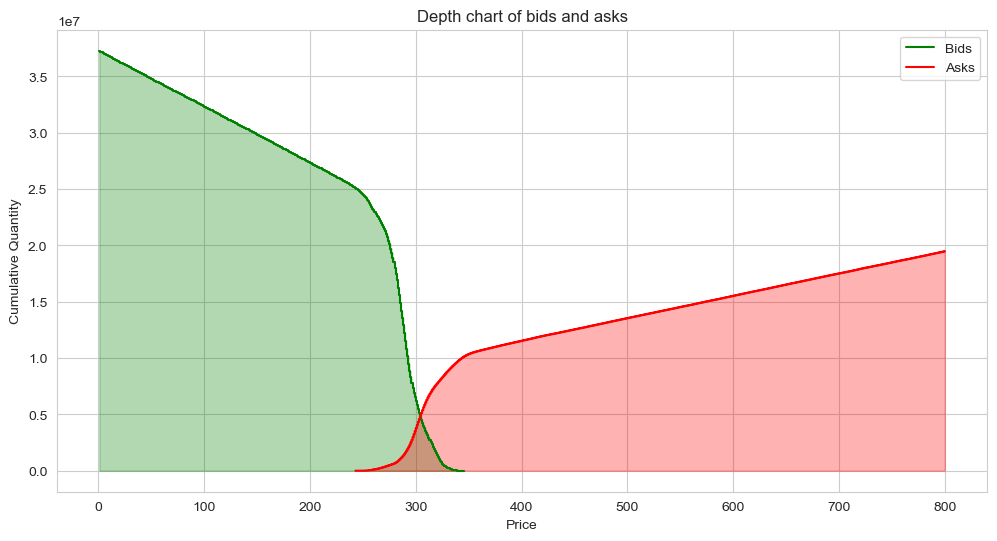

In [111]:
#bid/ask depth
from collections import defaultdict

#default dict to sum quantities for each price level
bid_price_levels = defaultdict(int)
ask_price_levels = defaultdict(int)

#sum quantities for each bid price level
for bid_list in lob['Bid']:
    for price, quantity in bid_list:
        bid_price_levels[price] += quantity

#sum quantities for each ask price level
for ask_list in lob['Ask']:
    for price, quantity in ask_list:
        ask_price_levels[price] += quantity

#convert dictionaries to lists and sort
bid_prices, bid_quantities = zip(*sorted(bid_price_levels.items(), reverse=True))
ask_prices, ask_quantities = zip(*sorted(ask_price_levels.items()))


#calc cumulative quantities for bids and asks
cumulative_bid_quantities = np.cumsum(bid_quantities)
cumulative_ask_quantities = np.cumsum(ask_quantities)

#plot
plt.figure(figsize=(12, 6))

#bids in descending order of price
plt.step(bid_prices, cumulative_bid_quantities, where='post', label='Bids', color='green')

#asks in ascending order of price
plt.step(ask_prices, cumulative_ask_quantities, where='post', label='Asks', color='red')

plt.fill_between(bid_prices, 0, cumulative_bid_quantities, step='post', alpha=0.3, color='green')
plt.fill_between(ask_prices, 0, cumulative_ask_quantities, step='post', alpha=0.3, color='red')

plt.title('Depth chart of bids and asks')
plt.xlabel('Price')
plt.ylabel('Cumulative Quantity')
plt.legend()
plt.grid(True)

I'm new to interpreting bid ask depth graphs but it appears there's a significant amount of liquidity on the bid side at lower prices (large green area) and less liquidity on the ask side at higher prices (narrower red area). The market has more buyers at lower prices and fewer sellers at higher prices up to a certain point, after which the number of sellers increases as the price continues to rise. So buyers hope to purchase at lower prices and sellers aim to sell at higher prices? I THINK

 [Return to contents](#Contents)<br>

## Outliers

_Mid_price outliers_

In [124]:
#calc Q1, Q3, and IQR
Q1 = lob['Mid_Price'].quantile(0.25)
Q3 = lob['Mid_Price'].quantile(0.75)
IQR = Q3 - Q1

#outlier critieria
outliers_criteria = ((lob['Mid_Price'] < (Q1 - 1.5 * IQR)) | (lob['Mid_Price'] > (Q3 + 1.5 * IQR)))

#filter 
outliers = lob[outliers_criteria]

print("Number of mid_price outliers detected-", outliers.shape[0])
print("Percentage of dataset:", (outliers.shape[0]/len(lob)))

Number of mid_price outliers detected- 49520
Percentage of dataset: 0.0477138862632762


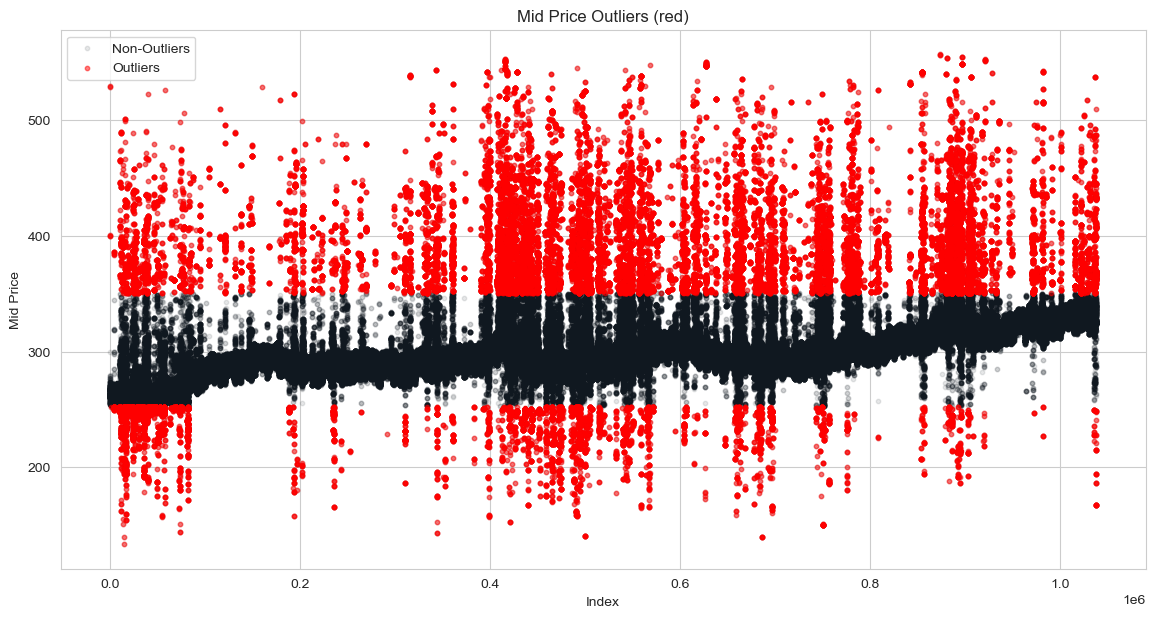

In [137]:
#visualise outliers
plt.figure(figsize=(14, 7))

#non outliers in blue, outliers red
plt.scatter(lob.index, lob['Mid_Price'], s=10, label='Non-Outliers', color='#101820', alpha=0.1)
plt.scatter(outliers.index, outliers['Mid_Price'], s=10, label='Outliers', color='red', alpha=0.5)

plt.title('Mid Price Outliers (red)')
plt.xlabel('Index')
plt.ylabel('Mid Price')
plt.legend()
plt.grid(True)
plt.show()

This feels like looks like a lot and more than 4.7%. Do we need to decrease our definition of outlier? Or use z scores instead? 

In [ ]:
#to remove if we agree on this methodology?
#lob = lob[~outliers_criteria]

 [Return to contents](#Contents)<br>

## Financial Technical Indicators

__Trend ("trend is your friend")__

- _Upward_ bullish
- _Downward_ bearish

- Simple Moving Average- SMA- fundamental- smooth out price data and identify trends for specified period- very reliable and filter out noise<br>
<br>
- Exponential SMA- place greater emphasis on recent price data- more responsive to trend changing than SMA <br>
<br>
- ADX average directional index- determine strength of trend- first have to calc the directional movement index. ranges from 0-100. 0-20- weak trend avoid trading. 20-40 developing trend. 40-60 relatively strong trend. 60-100 extremely strong trend. Be careful here too though as when trends are fast e.g. above 80 you have a high volatility market. Or can mean lots of noise. optimal 40-60. Confirm using other indicators. ADX doesnt tell us about direction JUST strength. <br>

In [138]:
#SMA
#10 (short) and 50 (long) are standard meaures
lob['SMA_Short'] = lob['Mid_Price'].rolling(window=10).mean() 
lob['SMA_Long'] = lob['Mid_Price'].rolling(window=50).mean() 

#may want to resample for daily?

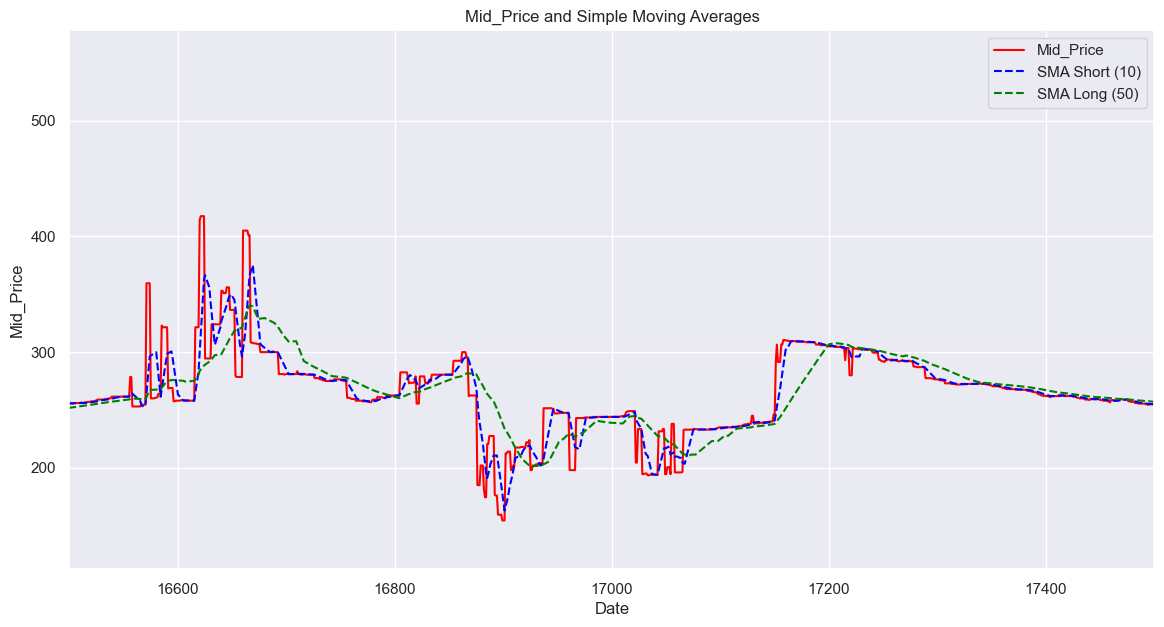

In [170]:
#visualise
plt.figure(figsize=(14, 7))

plt.plot(lob.index, lob['Mid_Price'], label='Mid_Price', color='red')
plt.plot(lob.index, lob['SMA_Short'], label='SMA Short (10)', color='blue',linestyle='--')
plt.plot(lob.index, lob['SMA_Long'], label='SMA Long (50)', color='green',linestyle='--')

#truncate to see pattern
start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.xlabel('Date')
plt.ylabel('Mid_Price')
plt.title('Mid_Price and Simple Moving Averages')
plt.legend()
plt.show()

In [149]:
#EMA
lob['EMA_Short'] = lob['Mid_Price'].ewm(span=10, adjust=False).mean()
lob['EMA_Long'] = lob['Mid_Price'].ewm(span=50, adjust=False).mean()

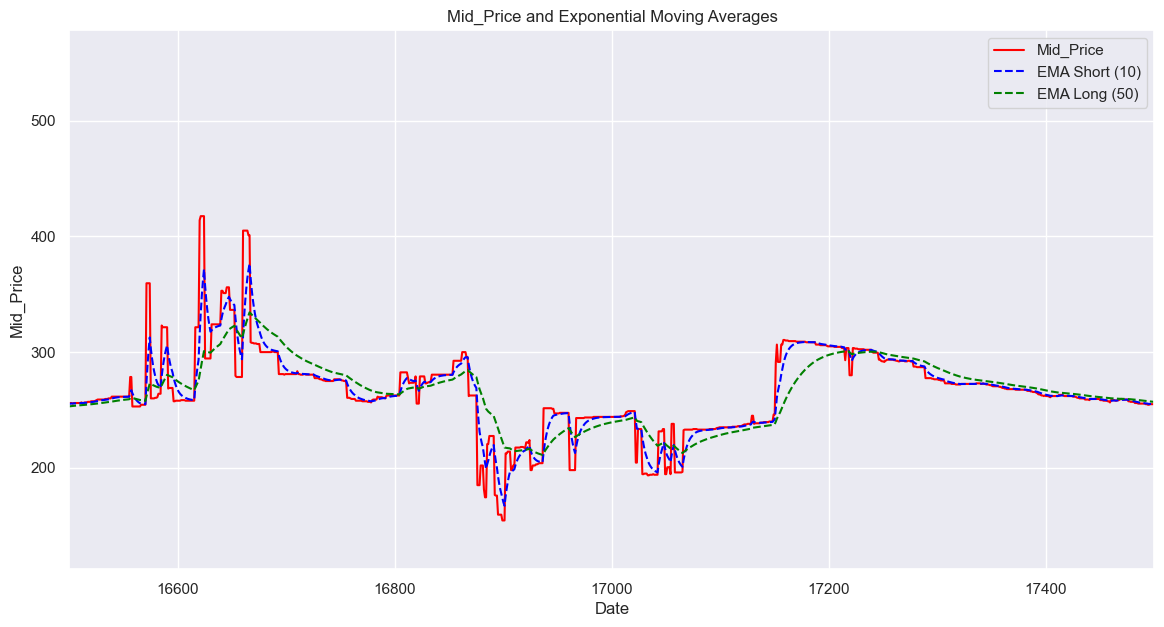

In [169]:
#visualise
plt.figure(figsize=(14, 7))

plt.plot(lob.index, lob['Mid_Price'], label='Mid_Price', color='red')
plt.plot(lob.index, lob['EMA_Short'], label='EMA Short (10)', color='blue',linestyle='--')
plt.plot(lob.index, lob['EMA_Long'], label='EMA Long (50)', color='green',linestyle='--')

#truncate to see pattern
start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.xlabel('Date')
plt.ylabel('Mid_Price')
plt.title('Mid_Price and Exponential Moving Averages')
plt.legend()
plt.show()

In [152]:
#ADX not possible without the actual high low and close prices for each period.

__Momentum__
- essential for understanding speed and power of price movements
- RSI-popular- overbought and oversold conditions-calculates with avg gain, avg loss and relative strength. You need to check direction not just value to understand trend. (see below img)

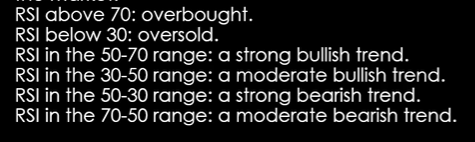

In [153]:
#rsi
delta = lob['Mid_Price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss

lob['RSI'] = 100 - (100 / (1 + RS))

In [155]:
lob['RSI'].describe().round(2)

count    948874.00
mean         40.92
std          39.75
min           0.00
25%           0.00
50%          33.33
75%          80.00
max         100.00
Name: RSI, dtype: float64

In [ ]:
#we cant calculate stochastic oscillator as no high low close etc

__Volatility__

- very useful for algorithmic trading
- help trades understand the degree of prics fluctuations. price change per time unit. high v- price is changing quite fast. low v- price is changing quite slow
- Bollinger Bands- moveing average calc over specified period e.g. 20 days. + bands for moving average + or - 2 Standard deviations. (Could be 1.5 or 2.5) 1.9-2.2 is usual for algorithmic trading. Identify volatility and potential trend reversals. When prices are near the upper band the asset may be overbought indicating a possible reversal or pullback. When prices are near the lower band- asset may be oversold suggesting a upward reversal.

In [156]:
#bollinger bands
MA = lob['Mid_Price'].rolling(window=20).mean() #over 20 periods
SD = lob['Mid_Price'].rolling(window=20).std()

lob['Upper_BB'] = MA + (2 * SD) #upper bb
lob['Lower_BB'] = MA - (2 * SD) #lower bb

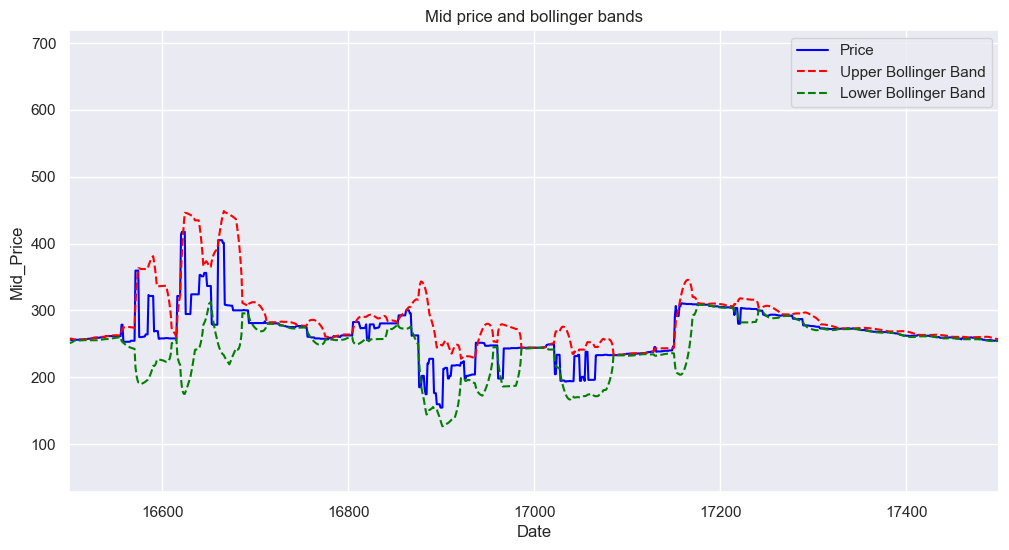

In [171]:
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

plt.plot(lob.index, lob['Mid_Price'], label='Price', color='blue')
plt.plot(lob.index, lob['Upper_BB'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(lob.index, lob['Lower_BB'], label='Lower Bollinger Band', linestyle='--', color='green')

#truncate to see pattern
start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.xlabel('Date')
plt.ylabel('Mid_Price')
plt.title('Mid price and bollinger bands')
plt.legend()

plt.show()

In [ ]:
#cant calc average true range as no high low close etc

__Volume__

- High volume- good indicator that more traders are entering exiting the market- high liquidity
- OBV -on balance volume- confirm trends by analysing volume changes. Persistnet rising obv suggests accumulation / buying pressure- associated with upward price movement. Persistent falling obv suggests distribution /selling pressure. Theory is that changes in volume preced price movements. Increase in volume often precedes a change in price direction. Use as trend,reversal and breakout confirmation.

- If today's close is higher than yesterday's close, then OBV = Previous OBV + today's volume.
- If today's close is lower than yesterday's close, then OBV = Previous OBV - today's volume.
- If today's close is equal to yesterday's close, then OBV = Previous OBV.

In [ ]:
#obv
#should be done using close but we can approximate with mid but might not be as reliable

#need volume to calculate (NEED TO CHECK THIS METHOD)
lob['Volume'] = lob['Bid'].apply(lambda x: sum([qty for price, qty in x])) + \
               lob['Ask'].apply(lambda x: sum([qty for price, qty in x]))

#calc obv
direction = lob['Mid_Price'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
lob['OBV'] = (direction * lob['Volume']).cumsum()

In [ ]:
#cant calculate chakin money flow without high low close etc

In [ ]:
#VWAP might be good too but we would need to resample for daily
#gives an average price a security has traded at throughout the day, based on both volume and price.
#e.g. tape['VWAP'] = (tape['Price'] * tape['Quantity']).cumsum() / tape['Quantity'].cumsum()

In [ ]:
#maybe also fourier transforms for long term cycles/trends
#FFT = np.fft.fft(np.asarray(tape['Price'].tolist()))
#FFT_real = np.real(FFT)
#tape['FFT'] = FFT_real

In [ ]:
#would lag features be useful?

__Depth__

In [ ]:
#so we have volume but

In [ ]:
#if we need a more complex calculation of depth (eg only orders within a certain price range of the mid price)
#we could try something like
def sum_volumes_in_range(order_list, mid_price, percentage_range):
    #price range based on the percentage
    lower_bound = mid_price * (1 - percentage_range)
    upper_bound = mid_price * (1 + percentage_range)
    
    #sum volumes where the price is within range
    return sum(volume for price, volume in order_list if lower_bound <= price <= upper_bound)

percentage_range = 0.10

lob['Depth'] = lob.apply(lambda row: sum_volumes_in_range(row['Bid'], row['Mid_Price'], percentage_range) +
                                     sum_volumes_in_range(row['Ask'], row['Mid_Price'], percentage_range), axis=1)

In [177]:
lob.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price,SMA_Short,SMA_Long,EMA_Short,EMA_Long,RSI,Upper_BB,Lower_BB,Volume,OBV
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5,NaN,NaN,400.500000,400.500000,NaN,NaN,NaN,7,0
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0,NaN,NaN,400.409091,400.480392,NaN,NaN,NaN,7,-7
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5,NaN,NaN,400.243802,400.441945,NaN,NaN,NaN,7,-14
5,1.736,2025-01-02,Exch0,"[[261, 1], [1, 6]]","[[798, 1]]",529.5,NaN,NaN,423.744929,405.503046,NaN,NaN,NaN,8,-6
6,1.984,2025-01-02,Exch0,"[[261, 1], [1, 6]]","[[797, 1]]",529.0,NaN,NaN,442.882214,410.346063,NaN,NaN,NaN,8,-14


In [180]:
#save lob (in Jupyter env)
lob.to_csv('lob.csv', index=False)

 [Return to contents](#Contents)<br>

__??Transform__

In [ ]:
#import required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
#normalise- scaling data to range between 0 and 1
scaler = MinMaxScaler()
lob['Normalised_Mid_Price'] = scaler.fit_transform(lob[['Mid_Price']])

In [ ]:
#standardise- scaling data to mean of 0 and standard deviation of 1)
scaler = StandardScaler()
lob['Standardised_Mid_Price'] = scaler.fit_transform(lob[['Mid_Price']])

 [Return to contents](#Contents)<br>